<div style="background-color : yellow;  color : red ;  padding : 10px ; text-align : center;">

<h1> MMI714 </h1>
    
<h2> Homework Assignment </h2>

<h3> Gaussian Mixture Models (GMM) and the Expectation-Maximization (EM) algorithm</h3>

</div>

In [61]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
import os 

<div style="background-color : yellow; padding:0px; text-align : center; color : red">

<h1> Function to Generate Synthetic Data </h1>

</div>

In [2]:
def generate_gaussian_clusters(n_clusters, n_samples_per_cluster=300, mean_diff = [-5, 5] , cov_diff = [1, 0, 0],  seed=None):
	
	np.random.seed(seed)
	
	data    =  []
	labels  =  [] 
	means   =  [] 

	m1      =   mean_diff[0]     # I control the mean difficulty and covariances difficulty 
	m2      =   mean_diff[1]     # with this approach, I can create any kind of data without calling the function many times
	c1      =   cov_diff[0]
	c2      =   cov_diff[1]
	c3      =   cov_diff[2]

	dist    =  (m2 - m1)  
	step    =  dist / n_clusters    # To examine the algorithm, I restricted the randomness.   
	
	for i in range(n_clusters):
		
		mean_x   =   np.random.uniform(m1, m1 + step, 1)     # To examine the algorithm, I restricted the randomness 
		mean_y   =   np.random.uniform(mean_diff[0], m2, 1)  # Otherwise, I could not compare the effect of the parameters on the convergence 
		mean     =   np.array([mean_x[0], mean_y[0]])        # Full randomness prevents us from generating all conditions 

		cov      =  np.eye(2) * c1 + np.random.rand(2, 2) * c2  - c3        # Generate random 2x2 matrix and shift it, same constraints 
		cov      =  np.dot(cov, cov.T)                                      # To make it symmetric
		cov      =  cov + np.eye(2)                                         # To make it positive definite 
	
	
		mvn           =   sp.stats.multivariate_normal(mean=mean, cov=cov)   #   To create the distribution 
		cluster_data  =   mvn.rvs(size=n_samples_per_cluster)
	
		data.append(cluster_data)
		means.append(mean.tolist()) 
		labels.append(np.full(n_samples_per_cluster, i)) 

		m1 +=  step 
	
	data    =   np.vstack(data)
	means   =   np.array(means)
	labels  =   np.hstack(labels)
		
	return data, labels, means

<div style="background-color : yellow; padding:0px; text-align : center; color : red">

<h1> Function to Display the Synthetic Data </h1>

</div>

In [3]:
def display_clusters(data, labels, rows, columns, centers):
	
	
	fig, axes = plt.subplots(rows, columns, figsize=(5 * columns, 5 * rows))
	  
		
	if not type(data) is list:    # if there is one_plot  
	
		ax = axes 
		ax.scatter(data[:, 0], data[:, 1], c=labels, s=10, cmap='viridis')
		ax.plot(centers[:, 0], centers[:, 1], 'r*', markersize=15)
	
		ax.set_xlabel("X-axis")
		ax.set_ylabel("Y-axis")
	
	else :   # if there are many plot 
		
		axes = axes.ravel()
	
		for i, (d, l, c) in enumerate(zip(data, labels, centers)): 
			
			if i >= rows * columns:
				print("Warning: More data than subplots available. Increase rows or columns.")
				break
		
			ax = axes[i]
			ax.scatter(d[:, 0], d[:, 1], c=l, s=10, cmap='viridis')
			ax.plot(c[:, 0], c[:, 1], 'r*', markersize=15)
		
			ax.set_xlabel("X-axis")
			ax.set_ylabel("Y-axis")
	
	plt.tight_layout()
	plt.show()


In [4]:
data, labels, means  =  generate_gaussian_clusters(5, n_samples_per_cluster=300, mean_diff = [-30, 30] , cov_diff = [0, 10, 5],  seed=None)

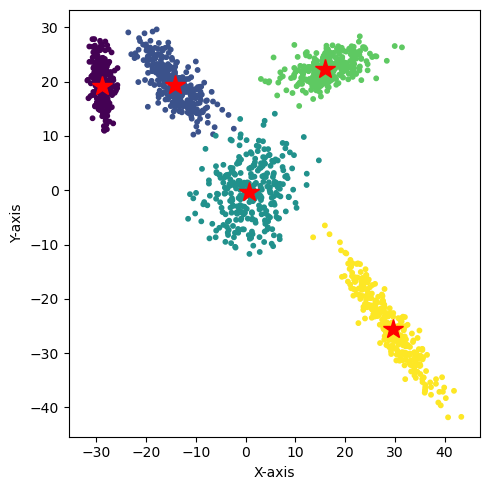

In [5]:
display_clusters(data, labels, 1, 1, means)

<div style="background-color : yellow; padding:0px; text-align : center; color : red">

<h1> We can create data according to the 4 difficulty levels :  </h1>

</div>

### 1-) Easy Means, Easy Covariances: <br>

When the means of the clusters (or the centers of each Gaussian distribution) are far apart, the algorithm can easily separate the clusters based on distance alone, making clustering straightforward. <br> The covariance matrices here resemble an identity matrix, meaning each cluster has a round shape with no elongation along any axis. This keeps the clusters compact, as data points within each cluster are close to their center. Since the clusters are both far apart and not too spread out, the algorithm can accurately assign points to clusters with minimal overlap or confusion. <br>

### 2-) Easy Means, Difficult Covariances: <br>

In this case, the means are still far apart, which should make clustering easier as in the first case. However, the covariance matrices are not like an identity matrix; they have large variances along specific axes. This results in elongated, more dispersed clusters, meaning points can be spread over a larger area. While the clusters are far apart, the overlap between them can increase due to this spreading effect, making it harder for the algorithm to correctly classify points, as they might lie on the borders between clusters. <br>

### 3-) Difficult Means, Easy Covariances: <br>

Here, the means are close together, so the algorithm may struggle to separate clusters based on distance, as points from different clusters can end up near each other. The covariance matrices are still similar to an identity matrix, which keeps each cluster compact and circular. The lack of elongation helps to limit overlap between clusters despite their close proximity. Even though the means are close, the compact nature of clusters helps the algorithm distinguish them better than if the clusters were more spread out. <br>

### 4-) Difficult Means, Difficult Covariances: <br>

In this scenario, the means are close together, making it inherently challenging for the algorithm to distinguish between clusters based on their centers. Additionally, the covariance matrices have large variances along some axes, causing the clusters to be elongated and spread out. This increases overlap between clusters even further, as points from different clusters can be very close or even intermingled. With clusters that are both close together and highly dispersed, it will be very difficult for the algorithm to assign points to the correct clusters, leading to less accurate clustering. <br> 

In [50]:
data1 , labels1 , means1  =  generate_gaussian_clusters(3, n_samples_per_cluster=300, mean_diff=[-40, 40], cov_diff=[5, 0, 0], seed=None)
data2 , labels2 , means2  =  generate_gaussian_clusters(3, n_samples_per_cluster=300, mean_diff=[-40, 40], cov_diff=[3, 30, 15], seed=None)
data3 , labels3 , means3  =  generate_gaussian_clusters(3, n_samples_per_cluster=300, mean_diff=[-5, 5], cov_diff=[1, 0, 0], seed=None)
data4 , labels4 , means4  =  generate_gaussian_clusters(3, n_samples_per_cluster=300, mean_diff=[-5, 5], cov_diff=[1, 10, 5], seed=None) 

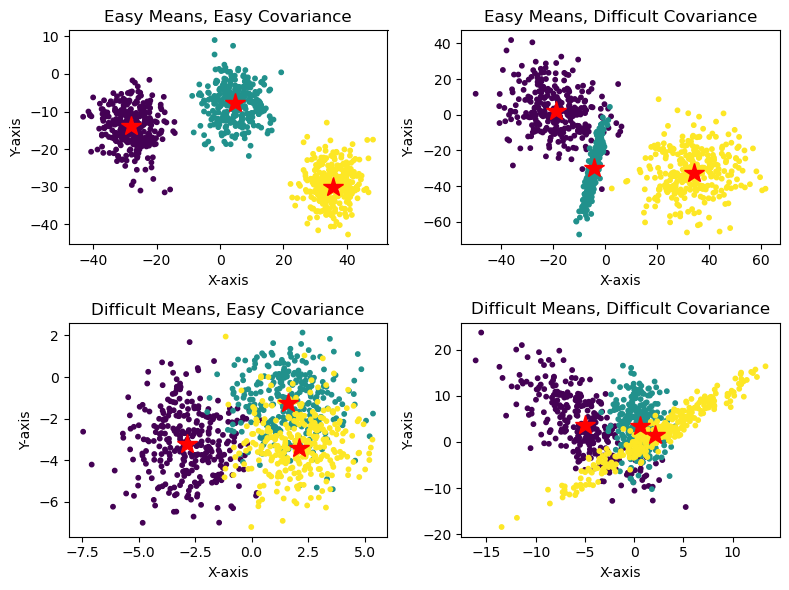

In [51]:
plt.figure(figsize=(8, 6))

# First subplot
plt.subplot(221)
plt.scatter(data1[:, 0], data1[:, 1], c=labels1, s=10, cmap='viridis')
plt.plot(means1[:, 0], means1[:, 1], 'r*', markersize=15)
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.title("Easy Means, Easy Covariance")

# Second subplot
plt.subplot(222)
plt.scatter(data2[:, 0], data2[:, 1], c=labels2, s=10, cmap='viridis')
plt.plot(means2[:, 0], means2[:, 1], 'r*', markersize=15)
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.title("Easy Means, Difficult Covariance")

# Third subplot
plt.subplot(223)
plt.scatter(data3[:, 0], data3[:, 1], c=labels3, s=10, cmap='viridis')
plt.plot(means3[:, 0], means3[:, 1], 'r*', markersize=15)
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.title("Difficult Means, Easy Covariance")

# Fourth subplot
plt.subplot(224)
plt.scatter(data4[:, 0], data4[:, 1], c=labels4, s=10, cmap='viridis')
plt.plot(means4[:, 0], means4[:, 1], 'r*', markersize=15)
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.title("Difficult Means, Difficult Covariance")

plt.tight_layout()  # Adjusts layout to prevent overlap
plt.show()


<div style="background-color : yellow; padding:0px; text-align : center; color : red">

<h1> Initialize Parameters (means, covariances, weights) Randomly : </h1>

</div>

Initialization of Weights: In a GMM, the weights represent the proportion of the dataset that belongs to each Gaussian component. <br> 
Initializing the weights this way ensures that each cluster starts with an equal weight, indicating that initially, each cluster is assumed to contribute equally to the model.

In [8]:
def initialize_parameters(n_clusters, data):
	
	n_samples, n_features  =   data.shape                                      # like   (900, 2)  
	
	sorted_data   =   data[data[:, 0].argsort()]                               # I came up with this initialization method, after many trials.  
	split_data    =   np.array_split(sorted_data, n_clusters)                  # I wanted to prevent the overlapping means/centers that I encountered many times before. 
	means         =   np.array([np.mean(part, axis=0) for part in split_data]) # This was my own idea. 
	  
	data_var          =   np.var(data, axis=0)                                                      # Variance across all features
	covariances       =   np.array([np.diag(data_var) / n_clusters for _ in range(n_clusters)])     # I came up with this second idea. 
	                                                                                                # I thought I can initialize covs according to "np.diag(data_var) / n_clusters" 
	weights           =   np.ones(n_clusters) / n_clusters                                          # Initialize weights uniformly like [0.33, 0.33, 0.33] , conventional way. 
	
	return means, covariances, weights

In [52]:
means1, covariances1, weights1   =   initialize_parameters(3, data1)

In [53]:
means2, covariances2, weights2   =   initialize_parameters(3, data2)

<div style="background-color : yellow; padding:0px; text-align : center; color : red">

<h1> Display Multi-Variate Gaussian (MVG) : </h1>

</div>

In [54]:
def display_mvg(data, labels, means, covs, iteration, run=0, dataname="", save_path="") : 
	
	min_x_y     =   data.min(axis=0)            # to find the borders, like [x_min, y_min]   =  [-20, -10]
	max_x_y     =   data.max(axis=0)            # to find the borders, like [x_max, y_max]   =  [15, 32]
	margin      =   0.1 * (max_x_y - min_x_y)   # get the 10 percent of the borders' ranges 
	
	
	x           =   np.linspace(min_x_y[0] - margin[0], max_x_y[0] + margin[0], 100)  # To create the grid data 
	y           =   np.linspace(min_x_y[1] - margin[1], max_x_y[1] + margin[1], 100)
	
	X, Y        =   np.meshgrid(x, y)         # get the grid 
	pos         =   np.dstack((X, Y))         # collect the positions / locations / coordinates 

	custom_colors = ['red', 'blue', 'yellow', 'green', 'purple', 'orange']     # I need n (number of clusters) different colors. 
															                   # Because I wanted to detect whether my initialization method helps the algorithm or not 
	
	plt.figure(figsize=(10, 6)) 
	plt.scatter(data[:, 0], data[:, 1], c=[custom_colors[l] for l in labels], alpha=0.5, s=10)    # Plot data 
	
	
	for i, (mean, cov) in enumerate(zip(means, covs)):
		
		Z = sp.stats.multivariate_normal.pdf(pos, mean=mean, cov=cov)                              # Calculate the Probability Density Function  
		plt.contour(X, Y, Z, levels=10, cmap='viridis', alpha=0.6)                                 # Plot contours 
		plt.scatter(mean[0], mean[1], color=custom_colors[i], s=100, marker='X', label=f'Mean: Cluster {i+1}')  # Plot means / centers (same colors as those of labels) 
	
	plt.title(f'Multivariate Normal Distribution (Iteration {iteration + 1})')
	plt.xlabel('X-axis')
	plt.ylabel('Y-axis')
	plt.legend()
	plt.grid() 
	
	if save_path and dataname: 
		new_path   =   save_path + "/" + dataname + "/run_" + np.str_(run + 1) + "/" 
		os.makedirs(new_path, exist_ok=True)                                                               # Create the directory if it doesn't exist
		plt.savefig(f"{new_path}{dataname}_run_{run + 1}_iteration_{iteration + 1}.png")
	
	plt.show()
	plt.close()

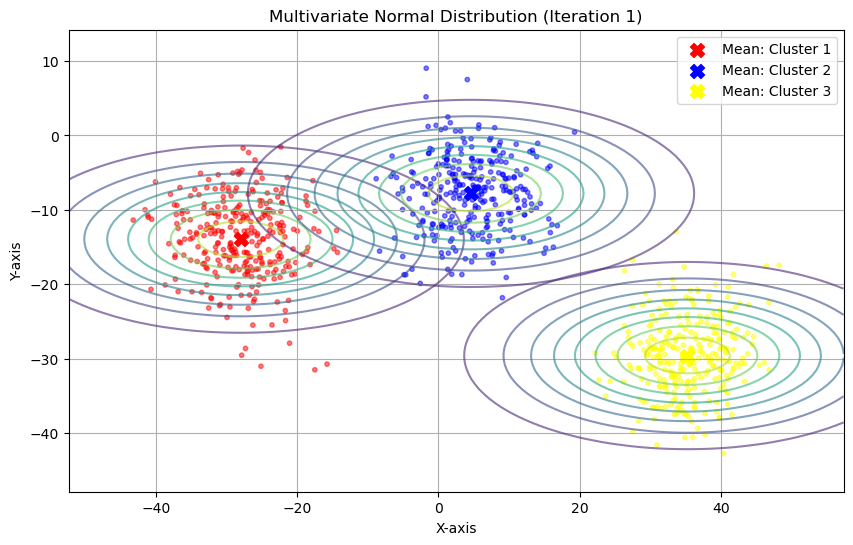

In [55]:
display_mvg(data1, labels1, means1, covariances1, 0)

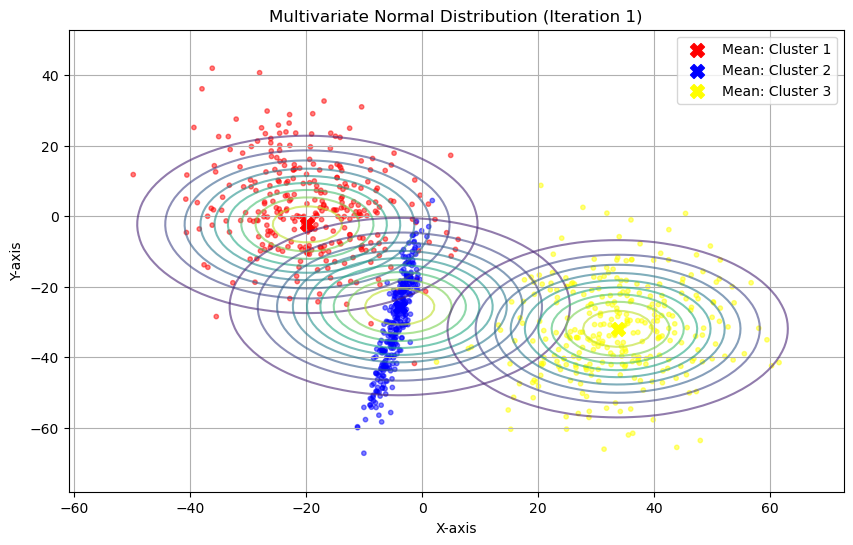

In [56]:
display_mvg(data2, labels2, means2, covariances2, 0)  

<div style="background-color : yellow; padding:0px; text-align : center; color : red">

<h1> Expectation Step : Responsibilities (Probabilities) </h1>

</div>

In [14]:
def e_step(data, means, covariances, weights):
	
    n_samples, n_clusters  =   data.shape[0], len(means)
    responsibilities       =   np.zeros((n_samples, n_clusters))   # like (900, 3)   all probabilities are initially zero . 
    
    for k in range(n_clusters):
		
        responsibilities[:, k] =   weights[k] * sp.stats.multivariate_normal.pdf(data, mean=means[k], cov=covariances[k])
		
    
    responsibilities          /=   responsibilities.sum(axis=1, keepdims=True)   #   # Normalize to get responsibilities 
	
    return responsibilities

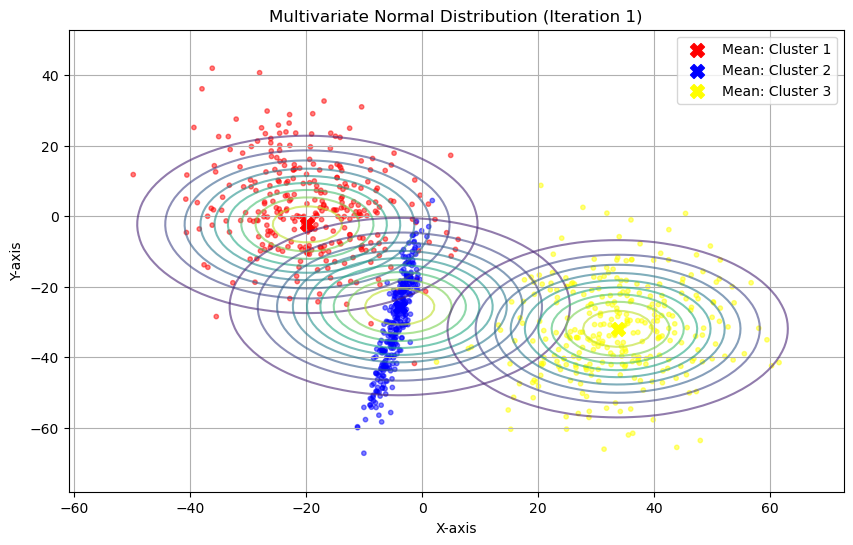

In [57]:
display_mvg(data2, labels2, means2, covariances2, 0)

In [59]:
pdf_1 = sp.stats.multivariate_normal.pdf(data2, mean=means2[0], cov=covariances2[0])
pdf_2 = sp.stats.multivariate_normal.pdf(data2, mean=means2[1], cov=covariances2[1])
pdf_3 = sp.stats.multivariate_normal.pdf(data2, mean=means2[2], cov=covariances2[2]) 

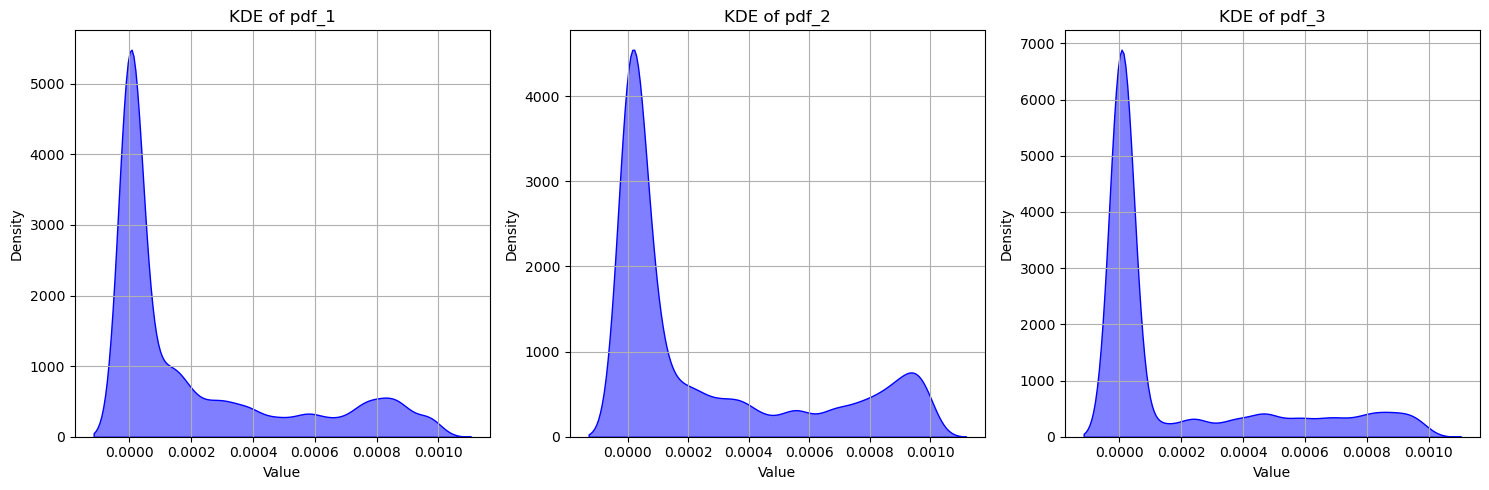

In [62]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

sns.kdeplot(pdf_1, bw_adjust=0.5, fill=True, color='blue', alpha=0.5, ax=axes[0])
axes[0].set_title('KDE of pdf_1')
axes[0].set_xlabel('Value')
axes[0].set_ylabel('Density')
axes[0].grid(True)

sns.kdeplot(pdf_2, bw_adjust=0.5, fill=True, color='blue', alpha=0.5, ax=axes[1])
axes[1].set_title('KDE of pdf_2')
axes[1].set_xlabel('Value')
axes[1].set_ylabel('Density')
axes[1].grid(True)

sns.kdeplot(pdf_3, bw_adjust=0.5, fill=True, color='blue', alpha=0.5, ax=axes[2])
axes[2].set_title('KDE of pdf_3')
axes[2].set_xlabel('Value')
axes[2].set_ylabel('Density')
axes[2].grid(True)

# Adjust layout
plt.tight_layout()
plt.show()

If we multiply these distributions/data by weights, the new distribution will be closer to our target. <br>
This is because we assume that our weights accurately reflect the proportion of the data belonging to each cluster. <br>
As a result, we will obtain the responsibilities as new probabilities.

<div style="background-color : yellow; padding:0px; text-align : center; color : red">

<h1> Maximizing Step :  </h1>

</div>

In [15]:
def m_step(data, responsibilities):
	
	n_features             =   data.shape[1] 
	n_clusters             =   responsibilities.shape[1]
	
	weights                =   responsibilities.sum(axis=0) / responsibilities.shape[0]      # probabilities give us the distribution of instances to clusters !  
	means                  =   np.zeros((n_clusters, n_features))                            # To get updated means and Covs we first need empty arrays. 
	covariances            =   np.zeros((n_clusters, n_features, n_features))
	
	for k in range(n_clusters):                                               # The math here is a genius idea (Dempster et al., 1977) 
		
		N_k             =   responsibilities[:, k].sum()
		means[k]        =   (responsibilities[:, k] @ data) / N_k             # like  (1, 900) x  (900, 2)  =  (1, 2) then  (1, 2) / N_k   e.g., [2.3, 8.6]  
		diff            =   data - means[k]                                   # This is like shifting the data mean to the zero aka. Expectation[diff] = 0 
		weighted_diff   =   (responsibilities[:, k].reshape(-1, 1) * diff)
		covariances[k]  =   (weighted_diff.T @ diff) / N_k                    # Update the covariance too . 
	
	return means, covariances, weights

<div style="background-color : yellow; padding:0px; text-align : center; color : red">

<h1> Expectation-Maximizing Algorithm :  </h1>

</div>

In [16]:
def em_algorithm(data, labels, num_cluster, max_iterations=100, threshold= 10**(-4) ,run=0, dataname="", save_path=""):

	means, covs, weights   =   initialize_parameters(num_cluster, data)
	old_log_likelihood     =   calculate_log_likelihood(data, means, covs, weights) 
	
	for iteration in range(max_iterations):
		
		responsibilities                =   e_step(data, means, covs, weights)           # Expectation step 
		means , covs , weights          =   m_step(data, responsibilities)               # Maximization Step 
		new_log_likelihood              =   calculate_log_likelihood(data, means, covs, weights) 

		change                          =   new_log_likelihood  - old_log_likelihood     # Calculate whether the change in the log likelihood decreases  

		print(new_log_likelihood)
		print(change)
		
		if change < threshold :     
			print("Converged ! ") 
			return display_mvg(data, labels, means, covs, iteration, run, dataname, save_path)   # last plot, if converged. 

		
		display_mvg(data, labels, means, covs, iteration, run, dataname, save_path) 

		old_log_likelihood   =   new_log_likelihood    # Update 
	
	return means , covs , weights  
	


In [17]:
def calculate_log_likelihood(data, means, covariances, weights):
	
    log_likelihood = 0
	
    for i in range(len(data)):
		
        mixture_likelihood = sum(weights[k] * sp.stats.multivariate_normal.pdf(data[i], mean=means[k], cov=covariances[k]) for k in range(len(means)))

# This is like calculating relationships of each data points with each parameters/so too clusters, then summing them. 
# This computes the likelihood of the single data point e.g., [2,5] belonging to each cluster, weighted by the prior probability of that cluster 
		
        log_likelihood    += np.log(mixture_likelihood)
		
    return log_likelihood

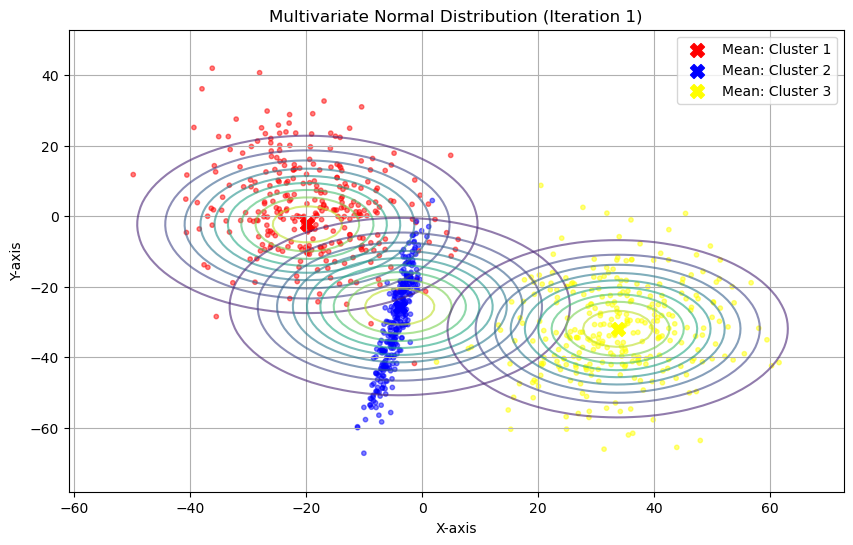

In [85]:
display_mvg(data2, labels2, means2, covariances2, 0)

In [84]:
data2[0]        #   it is probably blue color 

array([ -7.26814214, -19.42257137])

We can see this by looking at the densities. 

In [71]:
pdf_4 = sp.stats.multivariate_normal.pdf(data2[0], mean=means2[0], cov=covariances2[0]) 
pdf_5 = sp.stats.multivariate_normal.pdf(data2[0], mean=means2[1], cov=covariances2[1]) 
pdf_6 = sp.stats.multivariate_normal.pdf(data2[0], mean=means2[2], cov=covariances2[2]) 

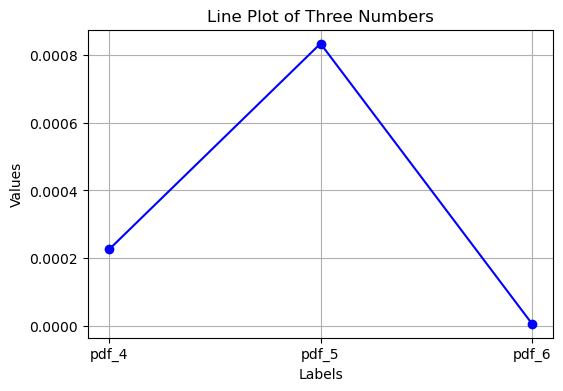

In [83]:
plt.figure(figsize=(6, 4))
plt.plot(["pdf_4", "pdf_5", "pdf_6"], [pdf_4, pdf_5, pdf_6], marker='o', linestyle='-', color='blue')
plt.title('Line Plot of Three Numbers')
plt.xlabel('Labels')
plt.ylabel('Values')
plt.grid(True)
plt.show()

<div style="background-color : yellow; padding:5px; text-align : center; color : red">

<h1> Results :  </h1>

</div>

In [18]:
save_path= "/home/turgay/Turgay/Academic/2024-2025/Fall/Generative_Models/Homework/images"

<div style="background-color : yellow; padding:0px; text-align : center; color : red">

<h1> Generate Easy and Difficult Data :   </h1>

</div>

#### We will use two different number of clusters (3 and 5).  

In [25]:
data_3_mean_easy_cov_easy , labels_3_mean_easy_cov_easy , means_3_mean_easy_cov_easy   =  generate_gaussian_clusters(3, n_samples_per_cluster=300, mean_diff=[-40, 40], cov_diff=[5, 0, 0], seed=None)
data_3_mean_easy_cov_diff , labels_3_mean_easy_cov_diff , means_3_mean_easy_cov_diff   =  generate_gaussian_clusters(3, n_samples_per_cluster=300, mean_diff=[-40, 40], cov_diff=[3, 30, 15], seed=None)
data_3_mean_diff_cov_easy , labels_3_mean_diff_cov_easy , means_3_mean_diff_cov_easy   =  generate_gaussian_clusters(3, n_samples_per_cluster=300, mean_diff=[-10, 10], cov_diff=[1, 0, 0], seed=None)
data_3_mean_diff_cov_diff , labels_3_mean_diff_cov_diff , means_3_mean_diff_cov_diff   =  generate_gaussian_clusters(3, n_samples_per_cluster=300, mean_diff=[-10, 10], cov_diff=[1, 10, 5], seed=None) 

data_5_mean_easy_cov_easy , labels_5_mean_easy_cov_easy , means_5_mean_easy_cov_easy   =  generate_gaussian_clusters(5, n_samples_per_cluster=300, mean_diff=[-40, 40], cov_diff=[5, 0, 0], seed=None)
data_5_mean_easy_cov_diff , labels_5_mean_easy_cov_diff , means_5_mean_easy_cov_diff   =  generate_gaussian_clusters(5, n_samples_per_cluster=300, mean_diff=[-40, 40], cov_diff=[3, 30, 15], seed=None)
data_5_mean_diff_cov_easy , labels_5_mean_diff_cov_easy , means_5_mean_diff_cov_easy   =  generate_gaussian_clusters(5, n_samples_per_cluster=300, mean_diff=[-10, 10], cov_diff=[1,0,0], seed=None)
data_5_mean_diff_cov_diff , labels_5_mean_diff_cov_diff , means_5_mean_diff_cov_diff   =  generate_gaussian_clusters(5, n_samples_per_cluster=300, mean_diff=[-10, 10], cov_diff=[1,10,5], seed=None) 


In [26]:
datas = [         data_3_mean_easy_cov_easy,
				  data_3_mean_easy_cov_diff, 
				  data_3_mean_diff_cov_easy,
				  data_3_mean_diff_cov_diff, 
				  
				  data_5_mean_easy_cov_easy, 
				  data_5_mean_easy_cov_diff, 
				  data_5_mean_diff_cov_easy, 
				  data_5_mean_diff_cov_diff
				 ] 

In [27]:
labels = [        labels_3_mean_easy_cov_easy,
				  labels_3_mean_easy_cov_diff, 
				  labels_3_mean_diff_cov_easy,
				  labels_3_mean_diff_cov_diff, 
				  
				  labels_5_mean_easy_cov_easy, 
				  labels_5_mean_easy_cov_diff, 
				  labels_5_mean_diff_cov_easy, 
				  labels_5_mean_diff_cov_diff
				 ] 

In [28]:
means = [         means_3_mean_easy_cov_easy,
				  means_3_mean_easy_cov_diff, 
				  means_3_mean_diff_cov_easy,
				  means_3_mean_diff_cov_diff, 
				  
				  means_5_mean_easy_cov_easy, 
				  means_5_mean_easy_cov_diff, 
				  means_5_mean_diff_cov_easy, 
				  means_5_mean_diff_cov_diff
				 ] 

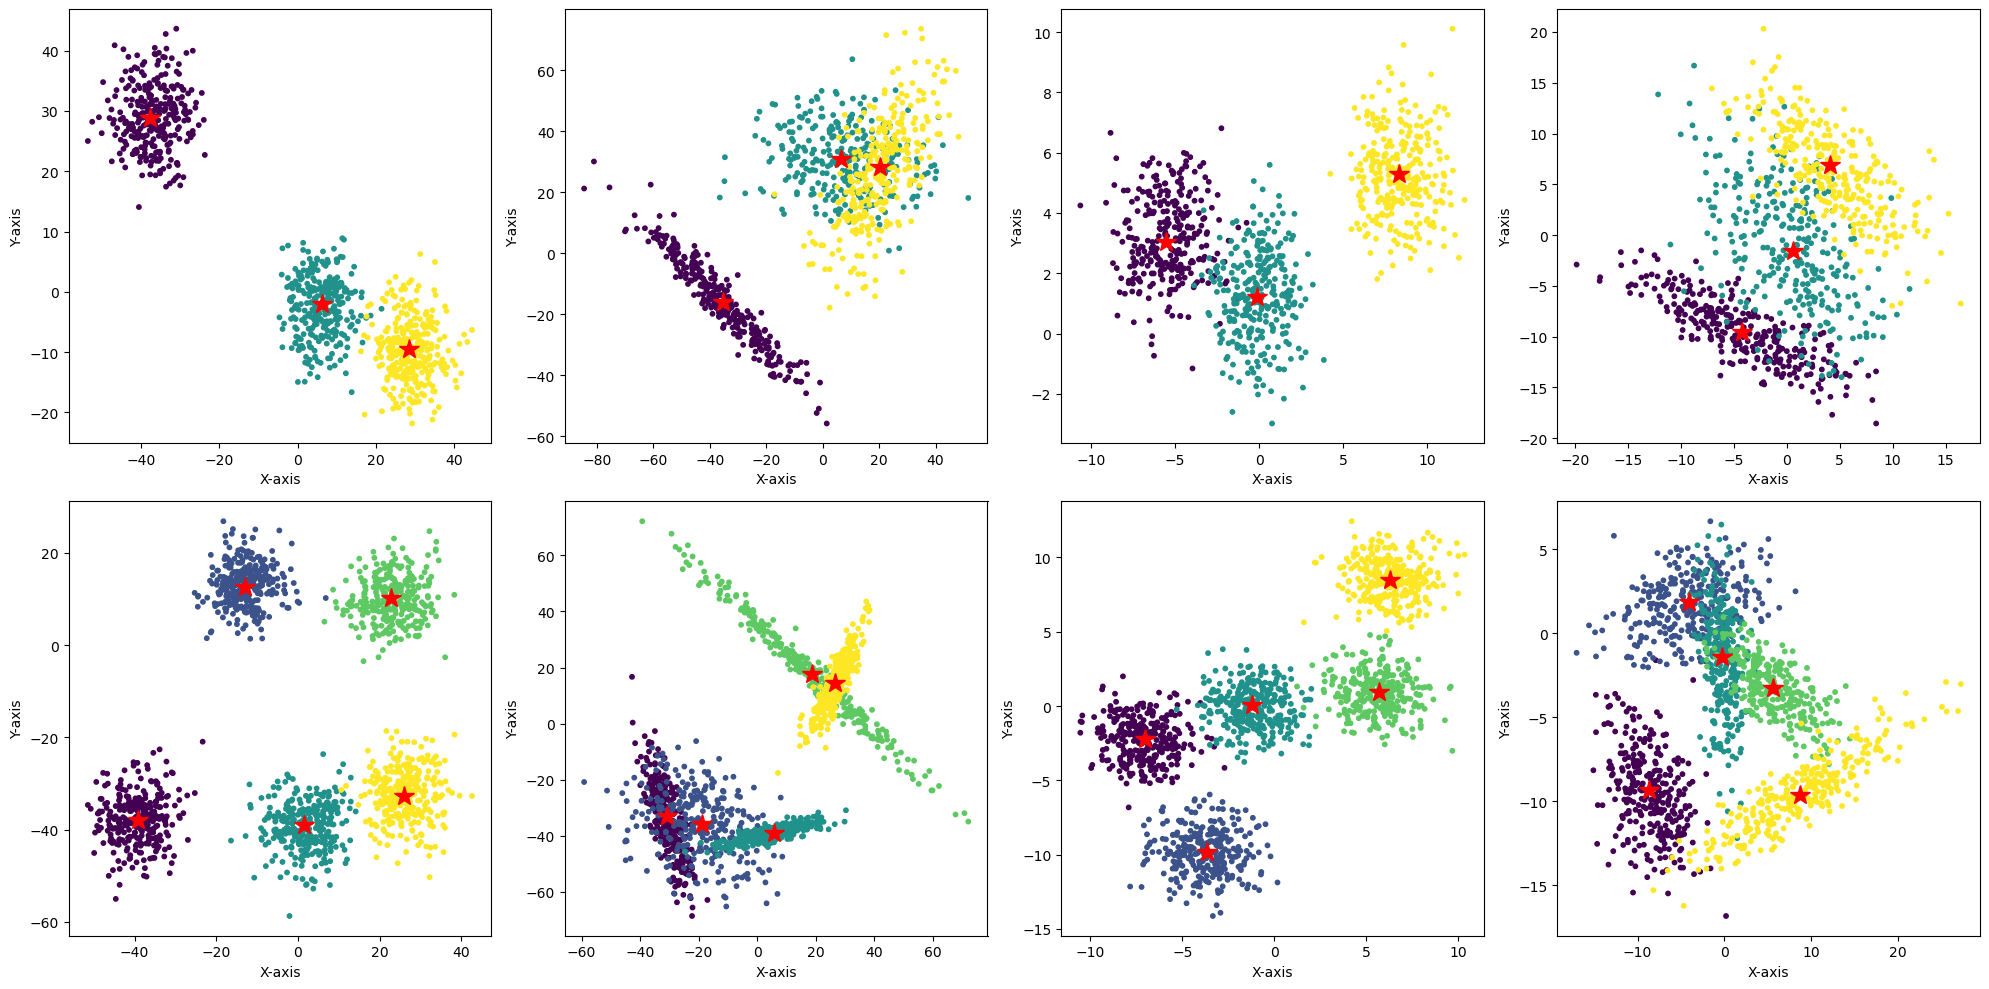

In [29]:
display_clusters(datas, labels , 2, 4, means)  

<div style="background-color : yellow; padding:0px; text-align : center; color : red">

<h1> Get Results :   </h1>

</div>

There are 8 different data and we will run them 3 times. <br> 
In the end, we will have 24 different results. 

In [24]:
names = [         "data_3_mean_easy_cov_easy",
				  "data_3_mean_easy_cov_diff", 
				  "data_3_mean_diff_cov_easy",
				  "data_3_mean_diff_cov_diff", 
				  "data_5_mean_easy_cov_easy", 
				  "data_5_mean_easy_cov_diff", 
				  "data_5_mean_diff_cov_easy", 
				  "data_5_mean_diff_cov_diff"
				 ] 

In [ ]:
for i in range(8):
	
	for k in range(3): 

		if i <= 3: 
			num_cluster = 3

		else: 
			num_cluster = 5

			
		em_algorithm(datas[i], labels[i], num_cluster, max_iterations=100, threshold=10**(-4), run=k, dataname=names[i], save_path=save_path)  

### Now, I want to trick (deceive) the algorithm by entering the wrong number of clusters instead of the actual numbers.

Now, there are 5 clusters here. I want to enter cluster_number as 4 and 6 to see the results. 
I am going to run the algorithm 3 times for each cluster numbers. 

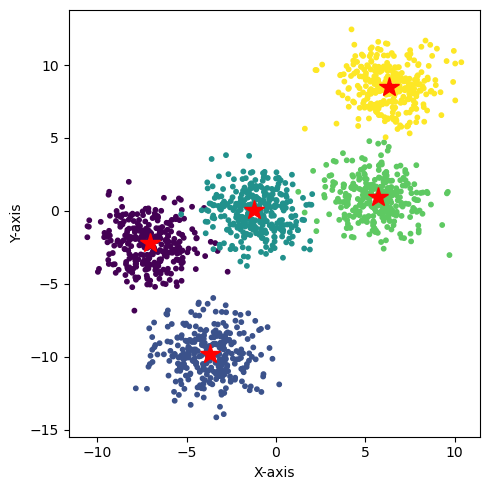

In [30]:
display_clusters(data_5_mean_diff_cov_easy, labels_5_mean_diff_cov_easy , 1, 1, means_5_mean_diff_cov_easy)  

In [ ]:
for k in range(3): 

	num_cluster = 6 

	dataname = "Num_cluster_" + np.str_(num_cluster) + "_" 
		
	em_algorithm(data_5_mean_diff_cov_easy, labels_5_mean_diff_cov_easy, num_cluster, max_iterations=100, threshold=10**(-4), run=k, dataname=dataname, save_path=save_path)  

<div style="background-color : yellow;  color : red ;  padding : 10px ; text-align : center;">

<h1> END</h1>
    
<h2> MMI714 : Homework Assignment: Gaussian Mixture Models (GMM) and the Expectation-Maximization (EM) algorithm  </h2>

<h3> Turgay Yıldız </h3>

</div>